Name: Arya Sun, Github Username: fearofhelicopter, USC ID: 8111052837

Vertebral Column Data Set

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

(a)Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [27]:
path = "../data/vertebral_column_data/column_2C.dat"
columns = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius", "grade_of_spondylolisthesis", "biclass"]
df = pd.read_table(path, names = columns, sep = " ")
df.loc[df.biclass == 'NO', 'biclass'] = 0
df.loc[df.biclass == 'AB', 'biclass'] = 1

#df

(b)Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

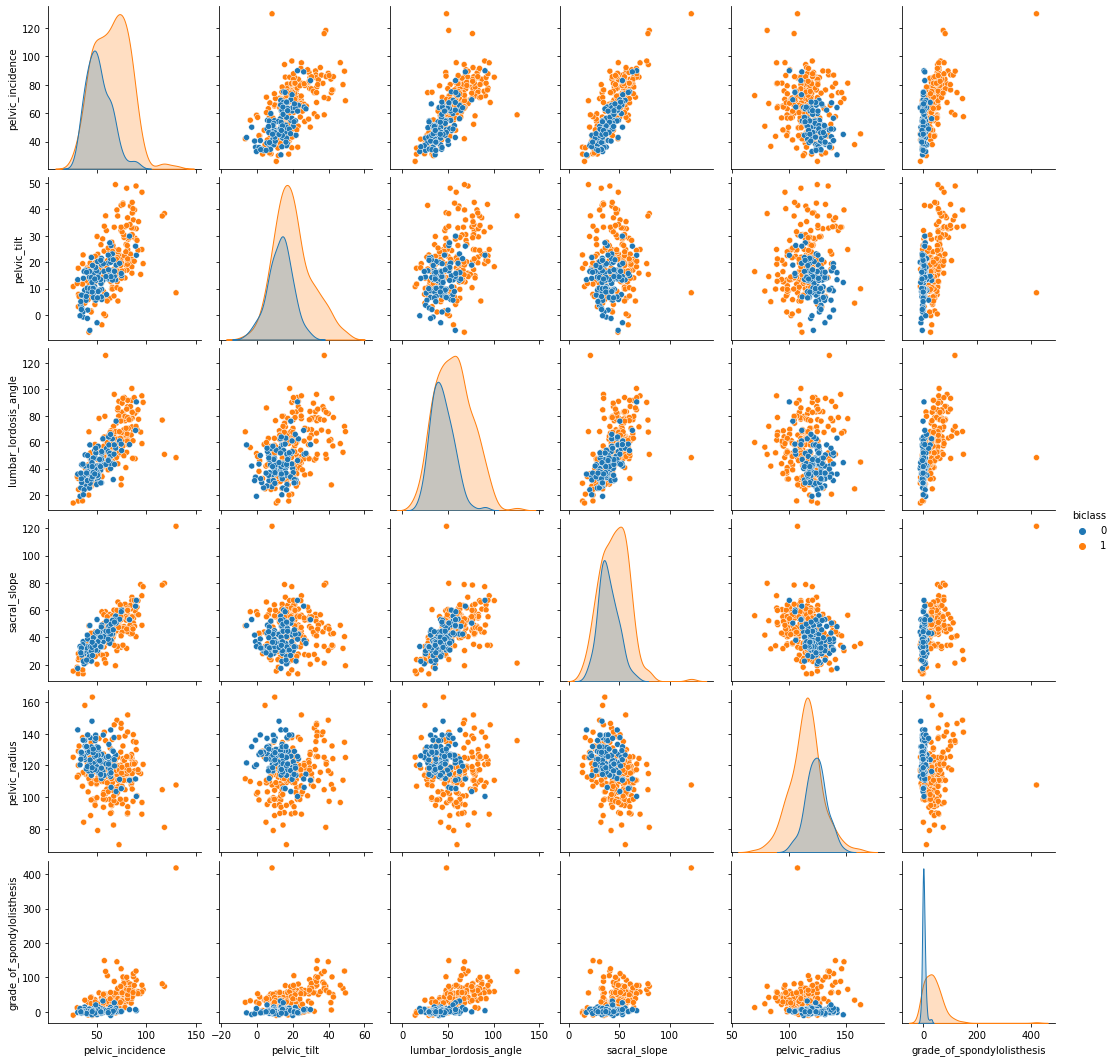

In [28]:
sns.pairplot(df, hue = "biclass")

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

Text(0.5, 1.0, 'Class 0')

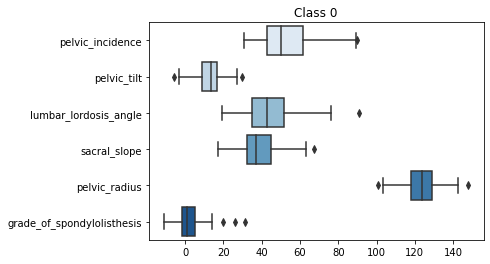

In [29]:
sns.boxplot(data = df[df['biclass'] == 0].drop(columns="biclass"), orient = "h", palette="Blues").set_title("Class 0")

Text(0.5, 1.0, 'Class 1')

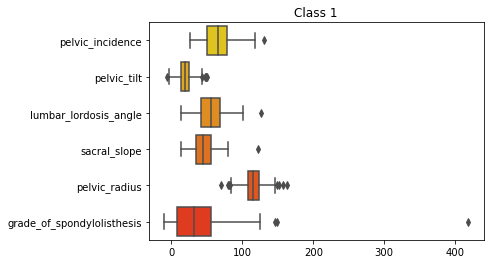

In [30]:
sns.boxplot(data = df[df['biclass'] == 1].drop(columns="biclass"), orient = "h", palette="autumn_r").set_title("Class 1")

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [31]:
#train0 = df[df['biclass'] == 0].head(70)
#train1 = df[df['biclass'] == 1].head(140)
training = pd.concat([df[df['biclass'] == 0].head(70), df[df['biclass'] == 1].head(140)])
test = df.drop(training.index.values)

training
test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,biclass
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


(c) Classification using KNN on Vertebral Column Data Set

i.Write code for k-nearest neighbors with Euclidean metric (or use a software package).

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*.

In [32]:
x_train  = training[["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius", "grade_of_spondylolisthesis"]]
y_train = training["biclass"].astype('int')
x_test  = test[["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius", "grade_of_spondylolisthesis"]]
y_test = test["biclass"].astype('int')

In [33]:
#create k list
n_neighbors = []
for i in range(208,0,-3):
    n_neighbors.append(i)
#print(n_neighbors)

In [34]:
K_k = []
dic_train_err=[]
dic_test_err =[]
#test set model
for i in n_neighbors:
    estimator = KNeighborsClassifier(p=2,n_neighbors=i)
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

The most suitable k is 4


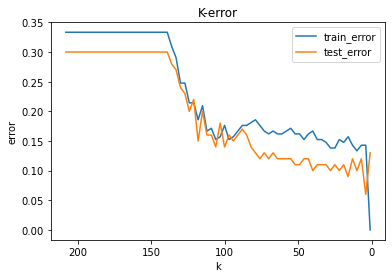

In [35]:
plt.figure()
plt.plot(K_k, dic_train_err, label = "train_error")
plt.plot(K_k, dic_test_err, label ="test_error")
plt.title("K-error")
plt.xlabel("k")
plt.ylabel("error")
ax = plt.gca()
ax.invert_xaxis()
plt.legend()
min_error=min(dic_test_err)
ind=dic_test_err.index(min_error)
k_good=K_k[ind]
print("The most suitable k is",k_good)

In [36]:
estimator = KNeighborsClassifier(p=2,n_neighbors=k_good)
estimator.fit(x_train, y_train)
y_pre = estimator.predict(x_test)# predict x_test

# Confusion Matrix, recall F1 support
confusion_mat = confusion_matrix(y_test, y_pre)

# true positive rate, true negative rate, precision, F1-score
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
Precision = TP / (TP + FP)
F1_score = 2 * (Precision * TPR) / (Precision + TPR)

print("confusion matrix: \n", confusion_mat)
print("true positive rate: ", TPR)
print("true negative rate: ", TNR)
print("precision", Precision)
print("F-score: ", F1_score)

confusion matrix: 
 [[25  5]
 [ 1 69]]
true positive rate:  0.9857142857142858
true negative rate:  0.8333333333333334
precision 0.9324324324324325
F-score:  0.9583333333333333


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 2 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 3 Note: for each N, select your training set by choosing the ﬁrst bN/3c rows of Class 0 and the ﬁrst N − bN/3c rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

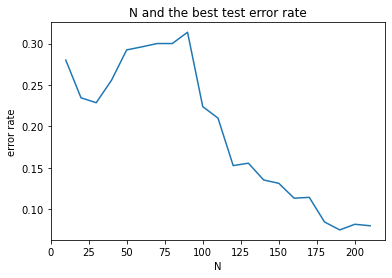

In [37]:
min_error_N = []
N = [i for i in range(10,211,10)]
for i in N:
    #print(f'<<<<<<<<<<<<--------------------{i}-------------------->>>>>>>>>>>>')
    class0 = (i//3)
    class1 = i-class0
    training = pd.concat([df[df['biclass'] == 0].head(class0), df[df['biclass'] == 1].head(class1)])
    test = df.drop(training.index.values)
    #print(training)
    #print(test)

    # training set & test set
    x_train = training[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius",
                        "grade_of_spondylolisthesis"]]
    y_train = training["biclass"].astype('int')
    x_test = test[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius",
                   "grade_of_spondylolisthesis"]]
    y_test = test["biclass"].astype('int')

    #create k list
    n_neighbors = []
    for i in range(1, i, 5):
        n_neighbors.append(i)
    #print(n_neighbors)

    list_train_err = []
    list_test_err = []
    
    #training set model
    for i in n_neighbors:
        estimator = KNeighborsClassifier(n_neighbors=i)
        estimator.fit(x_train, y_train)
        # train_test_accuracy
        train_score = estimator.score(x_train, y_train)
        test_score = estimator.score(x_test, y_test)
        list_train_err.append(1 - train_score) #  1 - train_score = error rate， （train_score=precision）
        list_test_err.append(1 - test_score)
    # print('y_test_err=', dic_test_err)
    # print('y_train_err=', dic_train_err)

    # lowest error rate added to min_error_N
    min_error = min(list_test_err)
    min_error_N.append(min_error)

#N and min error rate
plt.plot(N, min_error_N, label="K_good")
plt.title("N and the best test error rate")
plt.xlabel("N")
plt.ylabel("error rate")
plt.show()

Let us further explore some variants of KNN.

(d) Replace the Euclidean metric with the following metrics 4 and test them. Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

In [38]:
training = pd.concat([df[df['biclass'] == 0].head(70), df[df['biclass'] == 1].head(140)])
test = df.drop(training.index.values)

x_train  = training[["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius", "grade_of_spondylolisthesis"]]
y_train = training["biclass"].astype('int')
x_test  = test[["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius", "grade_of_spondylolisthesis"]]
y_test = test["biclass"].astype('int')

#create k list
n_neighbors = []
for i in range(1,197,5):
    n_neighbors.append(i)
#print(n_neighbors)

In [39]:
K_k = []
dic_train_err=[]
dic_test_err =[]

#test set model
for i in n_neighbors:
    estimator = KNeighborsClassifier(p=1,n_neighbors=i, metric = "minkowski")
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

min_error1=min(dic_test_err)
ind=dic_test_err.index(min_error1)
k_good1=K_k[ind]
print("The test error is", min_error1)
print("The best k is",k_good1)

The test error is 0.10999999999999999
The best k is 6


B. with log 10 (p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10 (p)?

In [40]:
K_k = []
dic_train_err=[]
dic_test_err =[]
loglist=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for p in loglist:
    estimator = KNeighborsClassifier(n_neighbors=k_good, p=pow(10,p), metric="minkowski")
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(p)

min_error2=min(dic_test_err)
ind=dic_test_err.index(min_error2)
p_good=K_k[ind+4]
print("The test error is", min_error2)
print("The best p is",p_good)

The test error is 0.06000000000000005
The best p is 0.6


C. which becomes Chebyshev Distance with p → ∞

In [41]:
K_k = []
dic_train_err=[]
dic_test_err =[]

for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i, metric="chebyshev")
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

min_error3=min(dic_test_err)
ind=dic_test_err.index(min_error3)
k_good2=K_k[ind]
print("The test error is", min_error3)
print("The best k is",k_good2)

The test error is 0.07999999999999996
The best k is 16


ii. Mahalanobis Distance.

In [42]:
K_k = []
dic_train_err=[]
dic_test_err =[]

cov_x_train = np.cov(x_train, rowvar = False)
for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i, metric="mahalanobis", metric_params={"VI": np.linalg.inv(cov_x_train)})
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

min_error=min(dic_test_err)
ind=dic_test_err.index(min_error)
k_good=K_k[ind+1]

print("The test error is", min_error)
print("The best k is",k_good)

The test error is 0.17000000000000004
The best k is 6


In [43]:
d = {'Distance':['Manhattan','Chebyshev','Mahalanobis'],'k':[k_good1,p_good,k_good2],'ErrorRate':[min_error1,min_error2,min_error3]}
table = pd.DataFrame(d)
table

,Distance,k,ErrorRate
0,Manhattan,6.0,0.11
1,Chebyshev,0.6,0.06
2,Mahalanobis,16.0,0.08


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [44]:
#Euclidean
K_k = []
dic_train_err=[]
dic_test_err =[]

for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i, metric = "euclidean", weights='distance')
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

min_error=min(dic_test_err)
ind=dic_test_err.index(min_error)
k_good=K_k[ind]
print("The test error is", min_error)
print("The best k is",k_good)


The test error is 0.09999999999999998
The best k is 6


In [45]:
#Manhattan
K_k = []
dic_train_err=[]
dic_test_err =[]

for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i, metric = "manhattan", weights='distance')
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

min_error=min(dic_test_err)
ind=dic_test_err.index(min_error)
k_good=K_k[ind]
print("The test error is", min_error)
print("The best k is",k_good)


The test error is 0.09999999999999998
The best k is 26


In [46]:
#Chebyshev
K_k = []
dic_train_err=[]
dic_test_err =[]

for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i, metric = "chebyshev", weights='distance')
    estimator.fit(x_train, y_train)
    # train_test_accuracy
    train_score=estimator.score(x_train, y_train)
    test_score=estimator.score(x_test, y_test)
    # train test error
    dic_train_err.append(1-train_score)
    dic_test_err.append(1-test_score)
    K_k.append(i)

min_error=min(dic_test_err)
ind=dic_test_err.index(min_error)
k_good=K_k[ind]
print("The test error is", min_error)
print("The best k is",k_good)

The test error is 0.10999999999999999
The best k is 16


(f) the lowest training error rate achieved is 0 when k = 1.